--- Filtering commands ---

vcftools --gzvcf autosomes.vcf.gz --minQ 20 --recode --recode-INFO-all --out autosomes.Q20

mv autosomes.Q20.recode.vcf  autosomes.Q20.vcf

bgzip autosomes.Q20.vcf

vcftools --gzvcf autosomes.Q20.vcf.gz  --min-meanDP 10  --recode --recode-INFO-all --out autosomes.Q20.D10

mv autosomes.Q20.D10.recode.vcf autosomes.Q20.DP10.vcf

bgzip autosomes.Q20.D10.vcf

--- Generate reports (for both Q20 and Q20.D10 files) ---

vcftools --vcf autosomes.Q20.vcf --missing-site --out autosomes.Q20.vcf

vcftools --vcf autosomes.Q20.vcf --missing-indv --out autosomes.Q20.vcf

In [1]:
# Import relevant libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint
import os

In [2]:
# After filtering the autosome sites based on the GQ and DP, check how many sites have a lot of missingness

name = 'joint_colombia_annotated'
notebook_path = os.path.abspath('preQC_general_analysis_filtered.ipynb')
site_missingness_raw = os.path.join(os.path.dirname(notebook_path), 'data/' + name + '.PRE-QC.lmiss')
site_missingness_gq20 = os.path.join(os.path.dirname(notebook_path), 'data/autosomes_filtered/' + name + '.autosomes.hg38.Q20.lmiss')
site_missingness_gq20_dp10 = os.path.join(os.path.dirname(notebook_path), 'data/autosomes_filtered/' + name + '.autosomes.hg38.Q20.D10.lmiss')

miss_raw, miss_gq20, miss_gq20_dp10 = [], [], []

# Read the lmiss file and extract the IDs and missingness
def read_lmiss_file(lmiss_path):
    """
    Read in the lmiss file and read in the F_MISS data.
    """
    miss_array = []
    with open(lmiss_path, 'r') as f:
        f.readline()     # skip header (CHR, POS, N_DATA, N_GENOTYPE_FILTERED, N_MISS, F_MISS)
        for line in f:
            line = line.split('\t')
            chr, f_miss = line[0][3:], float(line[-1])
            miss_array.append(f_miss)
            
    return(miss_array)

miss_gq20 = read_lmiss_file(site_missingness_gq20)
miss_gq20_dp10 = read_lmiss_file(site_missingness_gq20_dp10)
miss_raw = read_lmiss_file(site_missingness_raw)

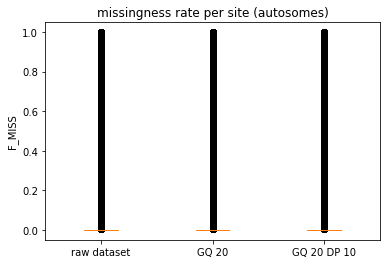

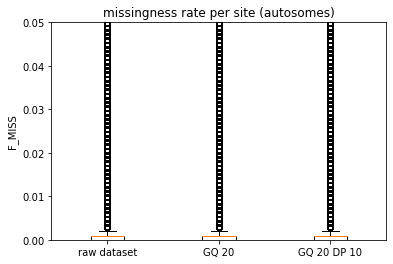

In [3]:
# Make figures

fig, ax = plt.subplots()
ax.boxplot([miss_raw, miss_gq20, miss_gq20_dp10])
ax.set_xticklabels(['raw dataset', 'GQ 20', 'GQ 20 DP 10'])
plt.title('missingness rate per site (autosomes)')
plt.ylabel('F_MISS')
plt.show()

# Zoom in

fig, ax = plt.subplots()
ax.boxplot([miss_raw, miss_gq20, miss_gq20_dp10])
ax.set_xticklabels(['raw dataset', 'GQ 20', 'GQ 20 DP 10'])
plt.ylim([0, 0.05])
plt.title('missingness rate per site (autosomes)')
plt.ylabel('F_MISS')
plt.show()

In [4]:
# After filtering the autosome sites based on the GQ and DP, check how many individuals have a lot of missingness.

name = 'joint_colombia_annotated'
notebook_path = os.path.abspath('preQC_general_analysis_filtered.ipynb')
indv_missingness_raw = os.path.join(os.path.dirname(notebook_path), 'data/' + name + '.PRE-QC.imiss')
indv_missingness_gq20 = os.path.join(os.path.dirname(notebook_path), 'data/autosomes_filtered/' + name + '.autosomes.hg38.Q20.imiss')
indv_missingness_gq20_dp10 = os.path.join(os.path.dirname(notebook_path), 'data/autosomes_filtered/' + name + '.autosomes.hg38.Q20.D10.imiss')

miss_raw, miss_gq20, miss_gq20_dp10 = [], [], []

# Read the imiss file and extract the IDs and missingness
def read_imiss_file(imiss_path):
    """
    Read in the imiss file and read in the F_MISS data.
    """
    miss_array = []
    with open(imiss_path, 'r') as f:
        f.readline()     # skip header (INDV, N_DATA, N_GENOTYPE_FILTERED, N_MISS, F_MISS)
        for line in f:
            line = line.split('\t')
            chr, f_miss = line[0][3:], float(line[-1])
            miss_array.append(f_miss)
            
    return(miss_array)

miss_gq20 = read_lmiss_file(indv_missingness_gq20)
miss_gq20_dp10 = read_lmiss_file(indv_missingness_gq20_dp10)
miss_raw = read_lmiss_file(indv_missingness_raw)

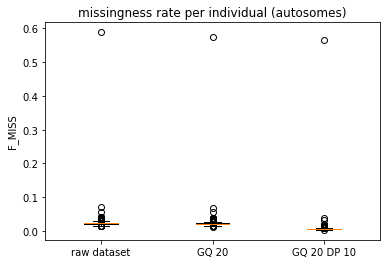

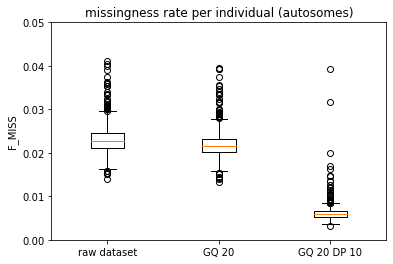

In [5]:
# Make figures

fig, ax = plt.subplots()
ax.boxplot([miss_raw, miss_gq20, miss_gq20_dp10])
ax.set_xticklabels(['raw dataset', 'GQ 20', 'GQ 20 DP 10'])
plt.title('missingness rate per individual (autosomes)')
plt.ylabel('F_MISS')
plt.show()

# Zoom in

fig, ax = plt.subplots()
ax.boxplot([miss_raw, miss_gq20, miss_gq20_dp10])
ax.set_xticklabels(['raw dataset', 'GQ 20', 'GQ 20 DP 10'])
plt.ylim([0, 0.05])
plt.title('missingness rate per individual (autosomes)')
plt.ylabel('F_MISS')
plt.show()